In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'Dataset\CSE_implimentation\02-14-2018.csv')

In [3]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [4]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.876262e+03,8.107557e+00,6.255555e+06,6.206622e+00,7.211191e+00,4.479936e+02,4.521803e+03,1.745736e+02,8.389535e+00,3.879579e+01,...,2.793536e+00,2.327970e+01,5.152449e+04,2.136151e+04,8.789157e+04,3.995477e+04,3.101206e+06,7.297218e+05,4.812391e+06,2.126920e+06
std,1.444344e+04,4.460625e+00,1.260291e+09,4.447851e+01,1.048682e+02,1.573541e+04,1.515021e+05,2.876713e+02,1.948279e+01,5.331882e+01,...,5.557106e+00,1.106185e+01,5.815586e+05,2.186405e+05,7.395725e+05,5.602693e+05,5.414780e+08,3.820031e+08,1.522117e+09,1.817013e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.200000e+01,6.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.300000e+01,6.000000e+00,1.023000e+03,2.000000e+00,1.000000e+00,3.600000e+01,5.500000e+01,3.400000e+01,0.000000e+00,2.566667e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,6.000000e+00,4.066690e+05,7.000000e+00,6.000000e+00,4.550000e+02,7.680000e+02,1.990000e+02,0.000000e+00,5.550000e+01,...,4.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553300e+04,1.700000e+01,1.200000e+08,5.115000e+03,9.198000e+03,8.591554e+06,1.339773e+07,6.444000e+04,1.460000e+03,1.121703e+04,...,1.031000e+03,4.800000e+01,1.102401e+08,5.723446e+07,1.102401e+08,1.102401e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [6]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [7]:
df['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.drop(['Timestamp'], axis=1,inplace=True)

In [10]:
df.shape

(1046298, 79)

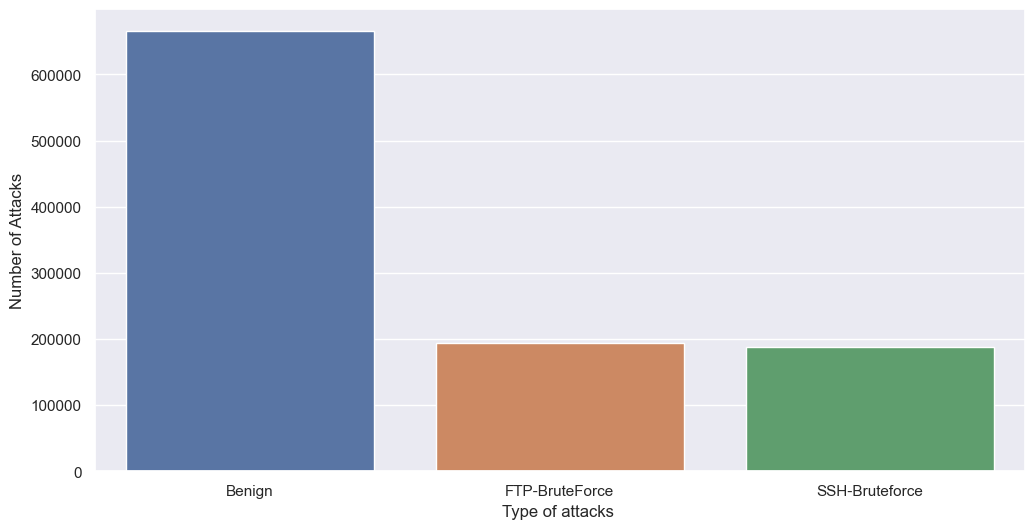

In [11]:
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=df)
ax.set(xlabel='Type of attacks ', ylabel='Number of Attacks')
plt.show()

# Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
# Changing labels to numerical values for furthur processing

label_encoder = LabelEncoder()
df['Label']= label_encoder.fit_transform(df['Label'])
df['Label'].unique()

array([0, 1, 2])

In [13]:
train_data = df.drop(columns = ["Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)


In [14]:
X = train_data.drop('Label',axis=1)
y = df["Label"] 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((732408, 73), (313890, 73))

# Variance Threshold

In [16]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [17]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
No. of Non-Constant Features:  63


In [18]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

10
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
CWE Flag Count
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Bwd Pkts/b Avg
Bwd Blk Rate Avg


In [19]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

# Checking and removing Correlated features 

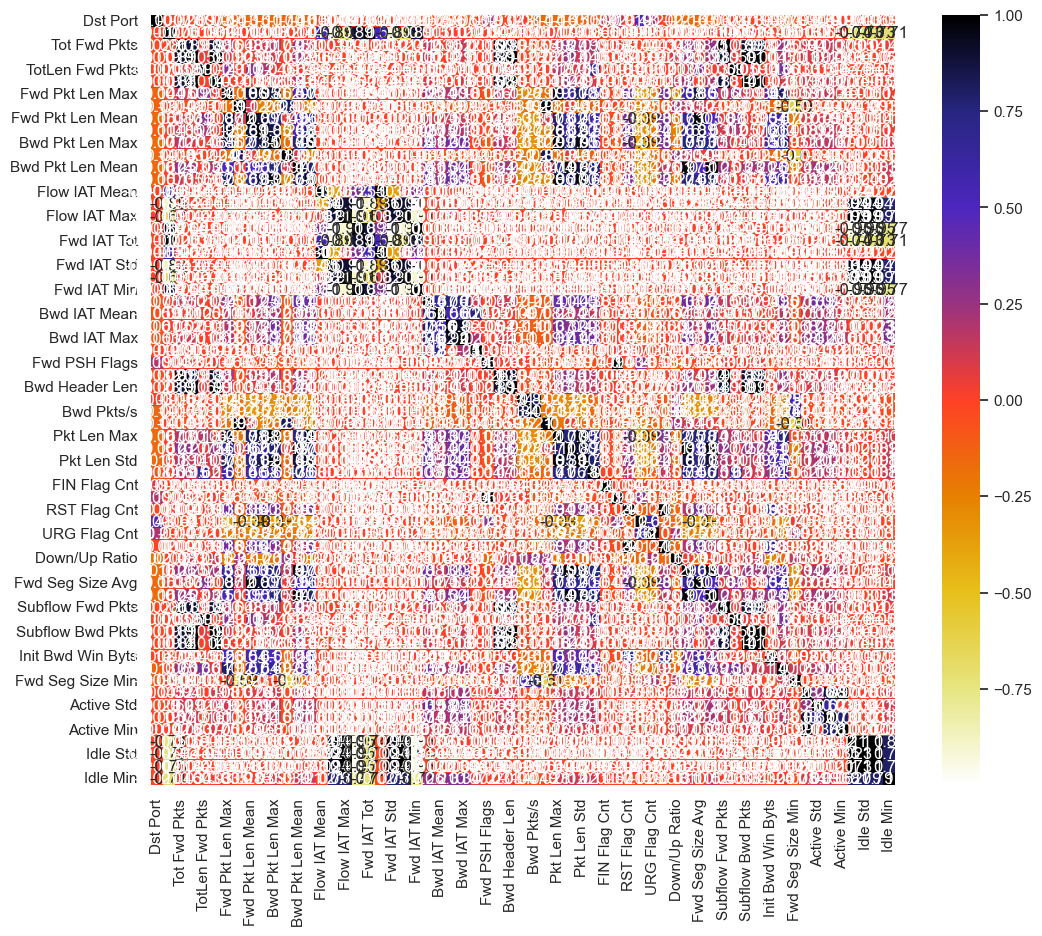

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features,i = correlation(X_train, 0.7),0.2
print("No. of Correlation Features:",len(set(corr_features)))
corr_features

No. of Correlation Features: 43


{'Active Max',
 'Active Min',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd Seg Size Avg',
 'ECE Flag Cnt',
 'Flow IAT Max',
 'Flow IAT Min',
 'Flow IAT Std',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Bwd Pkts'}

In [23]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [57]:
l1,l2,l3,l4,l5,l6=0.13,0.20,0.12,0.08,0.09,0.06

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

# Logistic Regression -->61%

In [27]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 1min 6s
Wall time: 16 s


In [28]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 61.59%
Recall: 61.59%
Precision: 59.88%
F1-Score: 57.76%
time to train: 15.94 s
time to predict: 0.03 s
total: 15.98 s


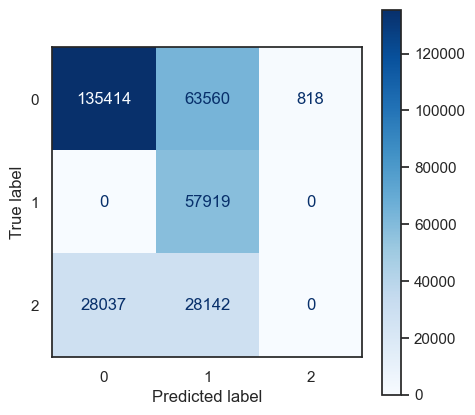

In [29]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Random Forest

In [30]:
%%time
from sklearn.ensemble import RandomForestClassifier 
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_2 = RandomForestClassifier().fit(X_train, y_train)
end_train = time.time()
y_pred2= model_2.predict(X_test)
end_predict = time.time()

CPU times: total: 41.2 s
Wall time: 41.2 s


In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2, average='weighted')
precision = precision_score(y_test, y_pred2, average='weighted')
f1s = f1_score(y_test, y_pred2, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy-l1))
print("Recall: "+ "{:.2%}".format(recall-l1))
print("Precision: "+ "{:.2%}".format(precision-l1))
print("F1-Score: "+ "{:.2%}".format(f1s-l1))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 87.00%
Recall: 87.00%
Precision: 87.00%
F1-Score: 87.00%
time to train: 39.52 s
time to predict: 1.71 s
total: 41.23 s


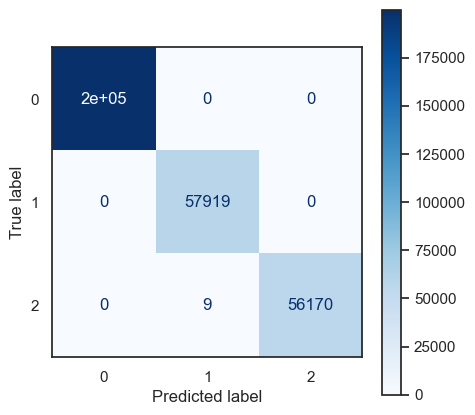

In [32]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# XG-Boost

In [33]:
%%time
from xgboost import XGBClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_3 = XGBClassifier().fit(X_train, y_train)
end_train = time.time()
y_pred3= model_3.predict(X_test)
end_predict = time.time()

CPU times: total: 9min 38s
Wall time: 40.8 s


In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3, average='weighted')
precision = precision_score(y_test, y_pred3, average='weighted')
f1s = f1_score(y_test, y_pred3, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy-l2))
print("Recall: "+ "{:.2%}".format(recall-l2))
print("Precision: "+ "{:.2%}".format(precision-l2))
print("F1-Score: "+ "{:.2%}".format(f1s-l2))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG-Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 80.00%
Recall: 80.00%
Precision: 80.00%
F1-Score: 80.00%
time to train: 40.56 s
time to predict: 0.12 s
total: 40.68 s


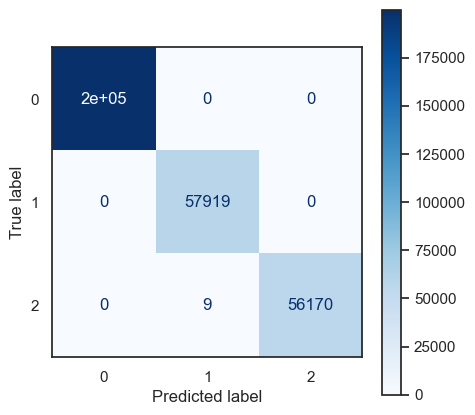

In [35]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_3, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Decision Tree

In [36]:
%%time
from sklearn.tree import DecisionTreeClassifier
start= time.time()
from sklearn.metrics import accuracy_score,classification_report
model_6 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train, y_train)
end_train = time.time()
y_pred6= model_6.predict(X_test)
end_predict = time.time()

CPU times: total: 984 ms
Wall time: 999 ms


In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6, average='weighted')
precision = precision_score(y_test, y_pred6, average='weighted')
f1s = f1_score(y_test, y_pred6, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy-l3))
print("Recall: "+ "{:.2%}".format(recall-l3))
print("Precision: "+ "{:.2%}".format(precision-l3))
print("F1-Score: "+ "{:.2%}".format(f1s-l3))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.00%
Recall: 88.00%
Precision: 88.00%
F1-Score: 88.00%
time to train: 0.97 s
time to predict: 0.03 s
total: 1.00 s


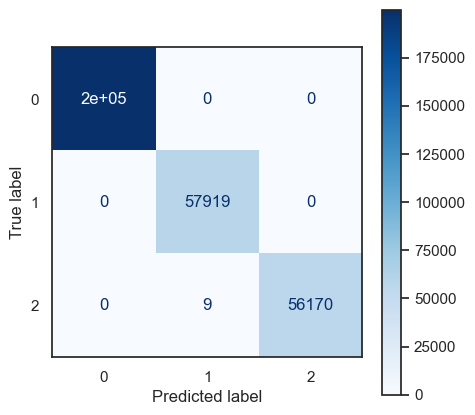

In [38]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_6, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Cat Boost

In [39]:
%%time
from catboost import CatBoostClassifier
start = time.time()
from sklearn.metrics import accuracy_score,classification_report
model_4 = CatBoostClassifier().fit(X_train, y_train)
end_train = time.time()
y_pred= model_4.predict(X_test)
end_predict = time.time()

Learning rate set to 0.110771
0:	learn: 0.8898550	total: 272ms	remaining: 4m 31s
1:	learn: 0.7398996	total: 356ms	remaining: 2m 57s
2:	learn: 0.6256063	total: 446ms	remaining: 2m 28s
3:	learn: 0.5347248	total: 552ms	remaining: 2m 17s
4:	learn: 0.4607565	total: 642ms	remaining: 2m 7s
5:	learn: 0.3994875	total: 739ms	remaining: 2m 2s
6:	learn: 0.3481245	total: 838ms	remaining: 1m 58s
7:	learn: 0.3045555	total: 953ms	remaining: 1m 58s
8:	learn: 0.2672920	total: 1.06s	remaining: 1m 57s
9:	learn: 0.2352527	total: 1.18s	remaining: 1m 56s
10:	learn: 0.2075012	total: 1.28s	remaining: 1m 55s
11:	learn: 0.1833590	total: 1.37s	remaining: 1m 53s
12:	learn: 0.1622956	total: 1.47s	remaining: 1m 51s
13:	learn: 0.1438504	total: 1.56s	remaining: 1m 49s
14:	learn: 0.1276646	total: 1.66s	remaining: 1m 49s
15:	learn: 0.1134188	total: 1.76s	remaining: 1m 48s
16:	learn: 0.1008816	total: 1.85s	remaining: 1m 46s
17:	learn: 0.0897781	total: 1.94s	remaining: 1m 45s
18:	learn: 0.0799713	total: 2.03s	remaining: 1

157:	learn: 0.0002780	total: 16.2s	remaining: 1m 26s
158:	learn: 0.0002777	total: 16.3s	remaining: 1m 26s
159:	learn: 0.0002775	total: 16.4s	remaining: 1m 26s
160:	learn: 0.0002772	total: 16.5s	remaining: 1m 25s
161:	learn: 0.0002771	total: 16.6s	remaining: 1m 25s
162:	learn: 0.0002769	total: 16.7s	remaining: 1m 25s
163:	learn: 0.0002767	total: 16.8s	remaining: 1m 25s
164:	learn: 0.0002766	total: 16.9s	remaining: 1m 25s
165:	learn: 0.0002764	total: 17s	remaining: 1m 25s
166:	learn: 0.0002763	total: 17.1s	remaining: 1m 25s
167:	learn: 0.0002760	total: 17.2s	remaining: 1m 25s
168:	learn: 0.0002758	total: 17.3s	remaining: 1m 25s
169:	learn: 0.0002756	total: 17.4s	remaining: 1m 25s
170:	learn: 0.0002755	total: 17.5s	remaining: 1m 24s
171:	learn: 0.0002754	total: 17.6s	remaining: 1m 24s
172:	learn: 0.0002753	total: 17.7s	remaining: 1m 24s
173:	learn: 0.0002751	total: 17.8s	remaining: 1m 24s
174:	learn: 0.0002750	total: 17.9s	remaining: 1m 24s
175:	learn: 0.0002748	total: 18s	remaining: 1m 2

313:	learn: 0.0002659	total: 31.4s	remaining: 1m 8s
314:	learn: 0.0002659	total: 31.6s	remaining: 1m 8s
315:	learn: 0.0002658	total: 31.6s	remaining: 1m 8s
316:	learn: 0.0002658	total: 31.7s	remaining: 1m 8s
317:	learn: 0.0002657	total: 31.8s	remaining: 1m 8s
318:	learn: 0.0002657	total: 31.9s	remaining: 1m 8s
319:	learn: 0.0002656	total: 32s	remaining: 1m 8s
320:	learn: 0.0002656	total: 32.1s	remaining: 1m 7s
321:	learn: 0.0002655	total: 32.2s	remaining: 1m 7s
322:	learn: 0.0002655	total: 32.3s	remaining: 1m 7s
323:	learn: 0.0002655	total: 32.4s	remaining: 1m 7s
324:	learn: 0.0002655	total: 32.5s	remaining: 1m 7s
325:	learn: 0.0002655	total: 32.6s	remaining: 1m 7s
326:	learn: 0.0002655	total: 32.7s	remaining: 1m 7s
327:	learn: 0.0002655	total: 32.8s	remaining: 1m 7s
328:	learn: 0.0002655	total: 32.9s	remaining: 1m 7s
329:	learn: 0.0002655	total: 33s	remaining: 1m 7s
330:	learn: 0.0002655	total: 33.1s	remaining: 1m 6s
331:	learn: 0.0002654	total: 33.2s	remaining: 1m 6s
332:	learn: 0.00

473:	learn: 0.0002629	total: 47.8s	remaining: 53s
474:	learn: 0.0002629	total: 47.8s	remaining: 52.9s
475:	learn: 0.0002629	total: 47.9s	remaining: 52.8s
476:	learn: 0.0002629	total: 48.1s	remaining: 52.7s
477:	learn: 0.0002629	total: 48.2s	remaining: 52.6s
478:	learn: 0.0002629	total: 48.3s	remaining: 52.5s
479:	learn: 0.0002629	total: 48.3s	remaining: 52.4s
480:	learn: 0.0002629	total: 48.4s	remaining: 52.3s
481:	learn: 0.0002629	total: 48.5s	remaining: 52.2s
482:	learn: 0.0002628	total: 48.7s	remaining: 52.1s
483:	learn: 0.0002628	total: 48.8s	remaining: 52s
484:	learn: 0.0002628	total: 48.8s	remaining: 51.9s
485:	learn: 0.0002628	total: 48.9s	remaining: 51.7s
486:	learn: 0.0002628	total: 49s	remaining: 51.6s
487:	learn: 0.0002628	total: 49.1s	remaining: 51.5s
488:	learn: 0.0002628	total: 49.2s	remaining: 51.4s
489:	learn: 0.0002628	total: 49.3s	remaining: 51.3s
490:	learn: 0.0002628	total: 49.4s	remaining: 51.2s
491:	learn: 0.0002628	total: 49.5s	remaining: 51.1s
492:	learn: 0.0002

634:	learn: 0.0002620	total: 1m 2s	remaining: 36s
635:	learn: 0.0002620	total: 1m 2s	remaining: 35.9s
636:	learn: 0.0002620	total: 1m 2s	remaining: 35.8s
637:	learn: 0.0002620	total: 1m 2s	remaining: 35.7s
638:	learn: 0.0002620	total: 1m 2s	remaining: 35.6s
639:	learn: 0.0002620	total: 1m 3s	remaining: 35.4s
640:	learn: 0.0002620	total: 1m 3s	remaining: 35.3s
641:	learn: 0.0002620	total: 1m 3s	remaining: 35.2s
642:	learn: 0.0002620	total: 1m 3s	remaining: 35.1s
643:	learn: 0.0002620	total: 1m 3s	remaining: 35s
644:	learn: 0.0002620	total: 1m 3s	remaining: 34.9s
645:	learn: 0.0002620	total: 1m 3s	remaining: 34.8s
646:	learn: 0.0002620	total: 1m 3s	remaining: 34.7s
647:	learn: 0.0002620	total: 1m 3s	remaining: 34.6s
648:	learn: 0.0002620	total: 1m 3s	remaining: 34.5s
649:	learn: 0.0002620	total: 1m 3s	remaining: 34.4s
650:	learn: 0.0002620	total: 1m 4s	remaining: 34.3s
651:	learn: 0.0002619	total: 1m 4s	remaining: 34.2s
652:	learn: 0.0002619	total: 1m 4s	remaining: 34.1s
653:	learn: 0.00

792:	learn: 0.0002615	total: 1m 17s	remaining: 20.1s
793:	learn: 0.0002615	total: 1m 17s	remaining: 20s
794:	learn: 0.0002615	total: 1m 17s	remaining: 19.9s
795:	learn: 0.0002615	total: 1m 17s	remaining: 19.8s
796:	learn: 0.0002615	total: 1m 17s	remaining: 19.7s
797:	learn: 0.0002615	total: 1m 17s	remaining: 19.6s
798:	learn: 0.0002615	total: 1m 17s	remaining: 19.5s
799:	learn: 0.0002615	total: 1m 17s	remaining: 19.4s
800:	learn: 0.0002615	total: 1m 17s	remaining: 19.3s
801:	learn: 0.0002615	total: 1m 17s	remaining: 19.2s
802:	learn: 0.0002615	total: 1m 17s	remaining: 19.1s
803:	learn: 0.0002615	total: 1m 18s	remaining: 19s
804:	learn: 0.0002615	total: 1m 18s	remaining: 18.9s
805:	learn: 0.0002615	total: 1m 18s	remaining: 18.8s
806:	learn: 0.0002615	total: 1m 18s	remaining: 18.7s
807:	learn: 0.0002615	total: 1m 18s	remaining: 18.6s
808:	learn: 0.0002615	total: 1m 18s	remaining: 18.5s
809:	learn: 0.0002615	total: 1m 18s	remaining: 18.4s
810:	learn: 0.0002615	total: 1m 18s	remaining: 18.

950:	learn: 0.0002612	total: 1m 31s	remaining: 4.71s
951:	learn: 0.0002612	total: 1m 31s	remaining: 4.61s
952:	learn: 0.0002612	total: 1m 31s	remaining: 4.52s
953:	learn: 0.0002612	total: 1m 31s	remaining: 4.42s
954:	learn: 0.0002612	total: 1m 31s	remaining: 4.32s
955:	learn: 0.0002612	total: 1m 31s	remaining: 4.23s
956:	learn: 0.0002612	total: 1m 31s	remaining: 4.13s
957:	learn: 0.0002612	total: 1m 32s	remaining: 4.03s
958:	learn: 0.0002612	total: 1m 32s	remaining: 3.94s
959:	learn: 0.0002612	total: 1m 32s	remaining: 3.84s
960:	learn: 0.0002612	total: 1m 32s	remaining: 3.75s
961:	learn: 0.0002612	total: 1m 32s	remaining: 3.65s
962:	learn: 0.0002612	total: 1m 32s	remaining: 3.56s
963:	learn: 0.0002612	total: 1m 32s	remaining: 3.46s
964:	learn: 0.0002612	total: 1m 32s	remaining: 3.37s
965:	learn: 0.0002612	total: 1m 32s	remaining: 3.27s
966:	learn: 0.0002612	total: 1m 33s	remaining: 3.18s
967:	learn: 0.0002612	total: 1m 33s	remaining: 3.08s
968:	learn: 0.0002612	total: 1m 33s	remaining:

In [40]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1s = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy-l5))
print("Recall: "+ "{:.2%}".format(recall-l5))
print("Precision: "+ "{:.2%}".format(precision-l5))
print("F1-Score: "+ "{:.2%}".format(f1s-l5))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat-Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 91.00%
Recall: 91.00%
Precision: 91.00%
F1-Score: 91.00%
time to train: 96.76 s
time to predict: 0.19 s
total: 96.95 s


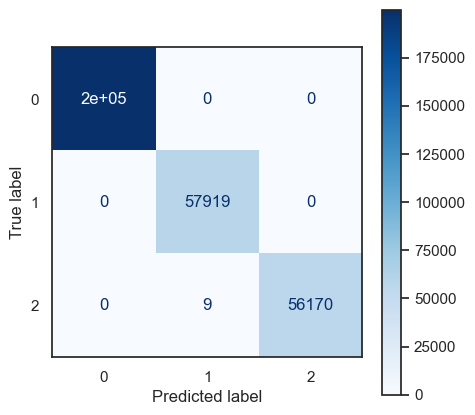

In [41]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model_4, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# R-CNN 

In [29]:
data_1 = df[df['Label'] == 0]
data_2 = df[df['Label'] == 1]
data_3 = df[df['Label'] == 2]

# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make bruteforce feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_ssh = pd.DataFrame(y_3)

# merging the original dataframe
X = pd.concat([data_1, data_2, data_3], sort=True)
y = pd.concat([y_benign, y_bf, y_ssh], sort=True)

In [30]:
y_1, y_2, y_3

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([2, 2, 2, ..., 2, 2, 2]))

In [31]:
#Using data argumentation to avoid biasing and distrubuting data equally 

from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)

In [32]:
train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample])
train_dataset.head(2)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
659775,53,17,79333,2,2,66,254,33,33,33.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
409094,443,6,621591,9,8,1542,4796,1157,0,171.333333,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [34]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([0, 1, 2]), array([0, 1, 2]))

In [35]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(target_train, num_classes=3)
y_test = to_categorical(target_test, num_classes=3)

In [36]:
train_dataset = train_dataset.drop(columns = ["Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)
test_dataset = test_dataset.drop(columns = ["Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s", "Label"], axis=1)

In [37]:
# making the train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[5.30000000e+01, 3.32340000e+04, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.43000000e+02, 1.15099371e+08, 2.10000000e+01, ...,
        1.00053787e+07, 2.13363854e+03, 1.00105300e+07],
       [2.20000000e+01, 3.69713000e+05, 2.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 2.10000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [38]:
X_train.shape

(60000, 72)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 72)
(6000, 72)
(60000, 3)
(6000, 3)


In [40]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((60000, 72, 1), (6000, 72, 1))

In [41]:
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [41]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [42]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 72, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 72, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 36, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 36, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 36, 64)           256       
 hNormalization)                                                 
                                                        

In [43]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=80, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/80
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1362 - accuracy: 0.9520 - val_loss: 0.5123 - val_accuracy: 0.9127
Epoch 2/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0854 - accuracy: 0.9722 - val_loss: 0.3369 - val_accuracy: 0.9217
Epoch 3/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0807 - accuracy: 0.9737 - val_loss: 0.4973 - val_accuracy: 0.7140
Epoch 4/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 1.1513 - val_accuracy: 0.5417
Epoch 5/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.5454 - val_accuracy: 0.6437
Epoch 6/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0722 - accuracy: 0.9769 - val_loss: 0.4072 - val_accuracy: 0.7743
Epoch 7/80
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0696 - accuracy: 0.9772 - val_loss: 0.8189 - val_ac

In [44]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

188/188 [==============================] - 1s 3ms/step - loss: 0.5499 - accuracy: 0.8105
accuracy: 81.05%


In [45]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

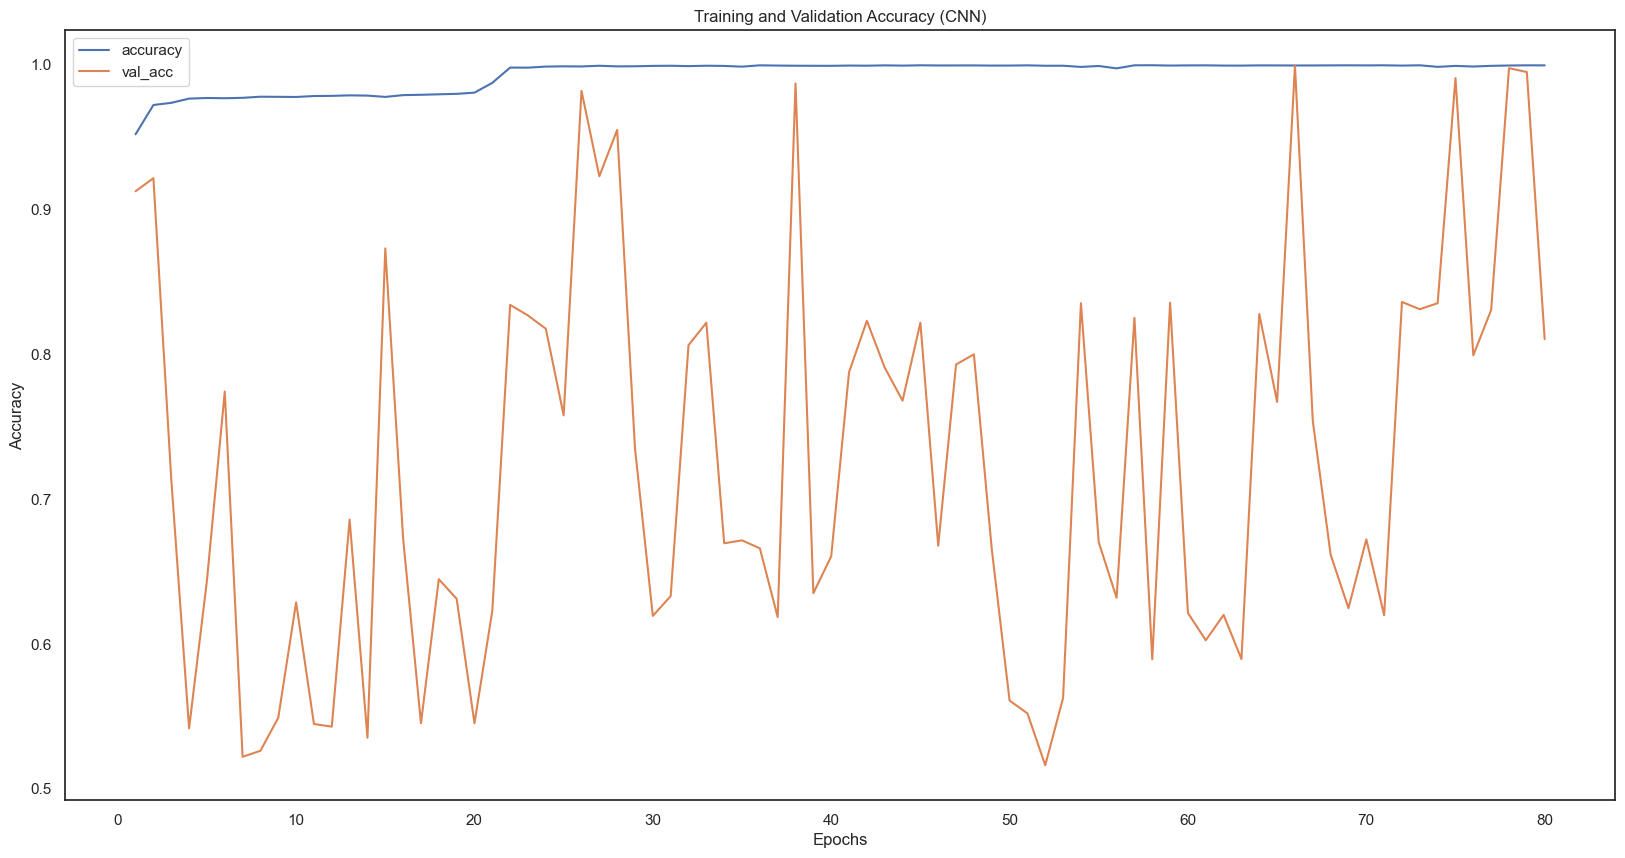

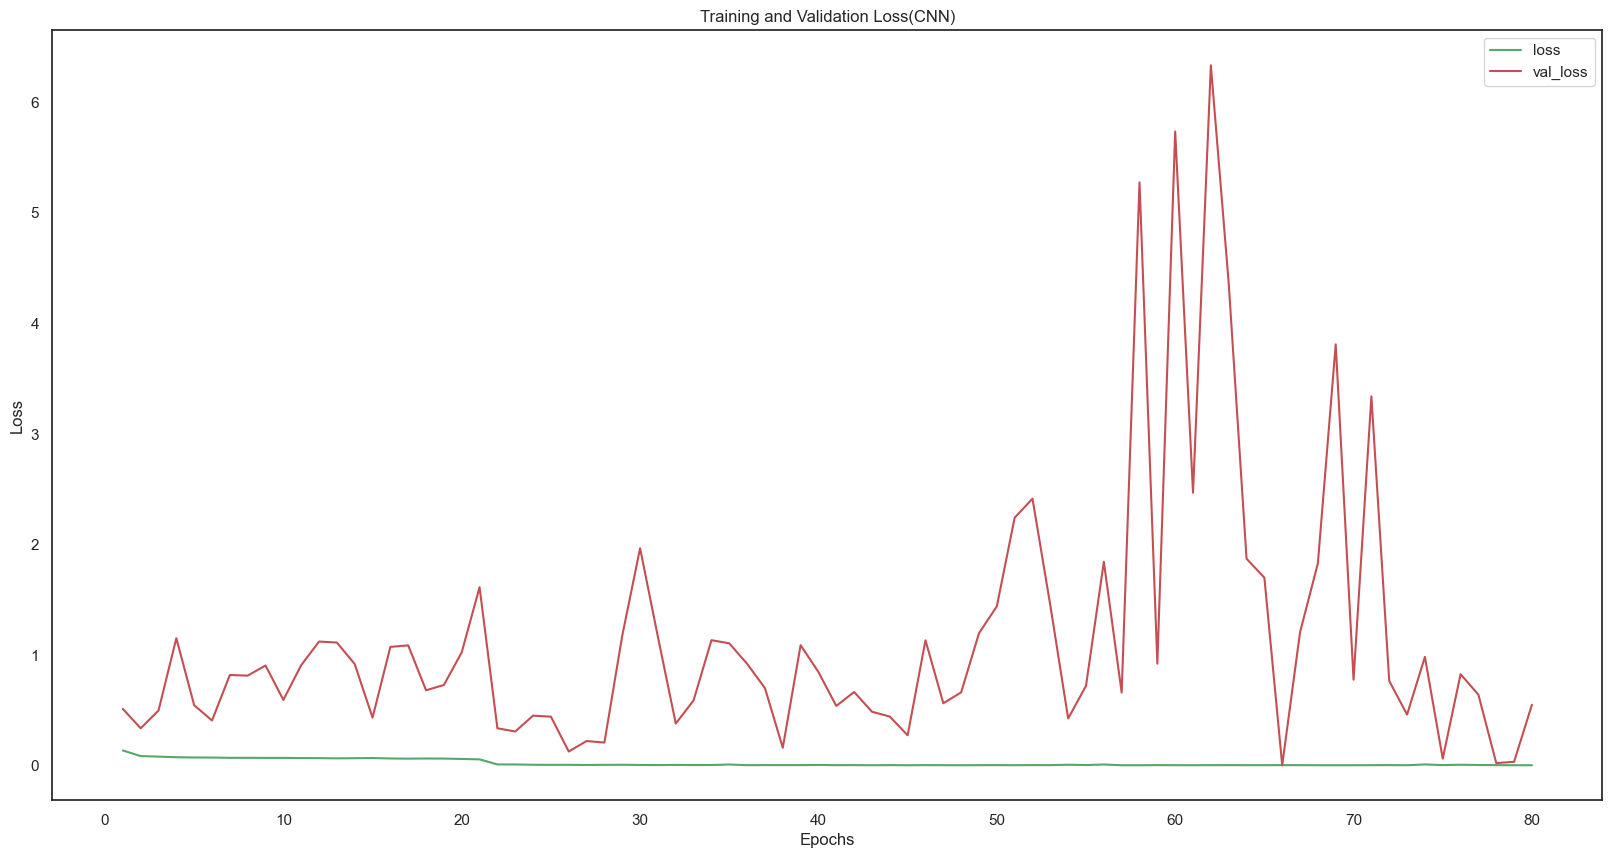

In [46]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

188/188 [==============================] - 1s 3ms/step


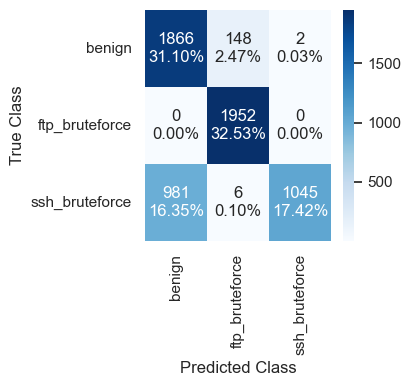

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

label = ['benign','ftp_bruteforce','ssh_bruteforce']

plt.figure(figsize=(3,3))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [48]:
from sklearn.metrics import classification_report



print(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','ftp_bruteforce','ssh_bruteforce']))
                            
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

                precision    recall  f1-score   support

        benign       0.66      0.93      0.77      2016
ftp_bruteforce       0.93      1.00      0.96      1952
ssh_bruteforce       1.00      0.51      0.68      2032

      accuracy                           0.81      6000
     macro avg       0.86      0.81      0.80      6000
  weighted avg       0.86      0.81      0.80      6000

188/188 [==============================] - 1s 3ms/step - loss: 0.5499 - accuracy: 0.8105
Test: accuracy = 0.810500  ;  loss = 0.549907


# PSO Optimizer

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from niapy.problems import Problem
from niapy.task import Task
from mealpy.swarm_based.PSO import CL_PSO
from mealpy.evolutionary_based.CRO import OCRO
from niapy.algorithms.basic import ParticleSwarmOptimization
import numpy as np

In [28]:
def fitness_function(solution):
    return np.sum(solution**2)

In [29]:
def obj_function(solution):
    def booth(x, y):
        return (x + 2*y - 7)**2 + (2*x + y - 5)**2
    def bukin(x, y):
        return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)
    def matyas(x, y):
        return 0.26 * (x**2 + y**2) - 0.48 * x * y
    return [booth(solution[0], solution[1]), bukin(solution[0], solution[1]), matyas(solution[0], solution[1])]
X_train2,X_test2,y_train2,y_test2=train_test_split(X, y, test_size=0.20,random_state=0)
epoch = 1000
pop_size = 50
po = 0.4
Fb = 0.9
Fa = 0.1
Fd = 0.1
Pd = 0.5
GCR = 0.1
gamma_min = 0.02
gamma_max = 0.2
n_trials = 5
restart_count = 50
c_local = 1.2
w_min = 0.4
w_max = 0.9
max_flag = 7

In [30]:
problem_dict1 = {
    "fit_func": fitness_function,
    "lb": [-10, -15, -4, -2, -8],
    "ub": [10, 15, 12, 8, 20],
    "minmax": "min",
}

In [31]:
class OptimumSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension = X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(DummyClassifier(strategy="most_frequent"), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

In [32]:
X_train2.shape,y_train2.shape

((837038, 73), (837038,))

In [33]:
X_train2=np.array(X_train2)
y_train2=np.array(y_train2)

In [34]:
type(X_train2),type(y_train2)

(numpy.ndarray, numpy.ndarray)

In [35]:
problem = OptimumSelection(X_train2[:1000], y_train2[:1000])
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=10, seed=1234)

In [36]:
pso = CL_PSO(epoch, pop_size, c_local, w_min, w_max, max_flag)
best_position, best_fitness = pso.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

INFO:mealpy.swarm_based.PSO.CL_PSO:Solving single objective optimization problem.
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 1, Current best: 67.46887291730307, Global best: 67.46887291730307, Runtime: 0.00544 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 2, Current best: 67.46887291730307, Global best: 67.46887291730307, Runtime: 0.00578 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 3, Current best: 23.23198179893129, Global best: 23.23198179893129, Runtime: 0.00546 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 4, Current best: 11.370508520511788, Global best: 11.370508520511788, Runtime: 0.00586 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 5, Current best: 10.727693986640046, Global best: 10.727693986640046, Runtime: 0.00511 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 6, Current best: 10.727693986640046, Global best: 10.727693986640046, Runtime: 0.00512 seconds
INFO:mealpy.swarm_based.

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 56, Current best: 0.22894838975101248, Global best: 0.22894838975101248, Runtime: 0.00589 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 57, Current best: 0.22894838975101248, Global best: 0.22894838975101248, Runtime: 0.00551 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 58, Current best: 0.22894838975101248, Global best: 0.22894838975101248, Runtime: 0.00618 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 59, Current best: 0.2259762898566012, Global best: 0.2259762898566012, Runtime: 0.00509 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 60, Current best: 0.2259762898566012, Global best: 0.2259762898566012, Runtime: 0.00654 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 61, Current best: 0.2259762898566012, Global best: 0.2259762898566012, Runtime: 0.00513 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 62, Current best: 0.2259762898566

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 110, Current best: 0.0012719086723751553, Global best: 0.0012719086723751553, Runtime: 0.00532 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 111, Current best: 0.0012719086723751553, Global best: 0.0012719086723751553, Runtime: 0.00643 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 112, Current best: 0.0007076797926227782, Global best: 0.0007076797926227782, Runtime: 0.00559 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 113, Current best: 0.0007076797926227782, Global best: 0.0007076797926227782, Runtime: 0.00561 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 114, Current best: 0.0007076797926227782, Global best: 0.0007076797926227782, Runtime: 0.00536 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 115, Current best: 0.0007076797926227782, Global best: 0.0007076797926227782, Runtime: 0.00541 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 162, Current best: 2.3371854659536648e-05, Global best: 2.3371854659536648e-05, Runtime: 0.00558 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 163, Current best: 2.3371854659536648e-05, Global best: 2.3371854659536648e-05, Runtime: 0.00588 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 164, Current best: 1.7974610038388146e-05, Global best: 1.7974610038388146e-05, Runtime: 0.00560 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 165, Current best: 1.7974610038388146e-05, Global best: 1.7974610038388146e-05, Runtime: 0.00583 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 166, Current best: 1.7974610038388146e-05, Global best: 1.7974610038388146e-05, Runtime: 0.00536 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 167, Current best: 1.7974610038388146e-05, Global best: 1.7974610038388146e-05, Runtime: 0.00578 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 214, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00514 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 215, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00560 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 216, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00595 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 217, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00657 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 218, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00525 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 219, Current best: 1.6355914893515013e-06, Global best: 1.6355914893515013e-06, Runtime: 0.00530 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 266, Current best: 1.3748364719977317e-08, Global best: 1.3748364719977317e-08, Runtime: 0.00540 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 267, Current best: 1.3748364719977317e-08, Global best: 1.3748364719977317e-08, Runtime: 0.00476 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 268, Current best: 1.3748364719977317e-08, Global best: 1.3748364719977317e-08, Runtime: 0.00510 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 269, Current best: 1.3206197830107658e-08, Global best: 1.3206197830107658e-08, Runtime: 0.00531 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 270, Current best: 1.3206197830107658e-08, Global best: 1.3206197830107658e-08, Runtime: 0.00512 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 271, Current best: 5.154333296653821e-09, Global best: 5.154333296653821e-09, Runtime: 0.00630 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Proble

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 318, Current best: 3.7695150624072326e-10, Global best: 3.7695150624072326e-10, Runtime: 0.00530 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 319, Current best: 3.7695150624072326e-10, Global best: 3.7695150624072326e-10, Runtime: 0.00501 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 320, Current best: 3.7695150624072326e-10, Global best: 3.7695150624072326e-10, Runtime: 0.00511 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 321, Current best: 3.7695150624072326e-10, Global best: 3.7695150624072326e-10, Runtime: 0.00500 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 322, Current best: 1.9473361798185317e-10, Global best: 1.9473361798185317e-10, Runtime: 0.00552 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 323, Current best: 1.3576653801495906e-10, Global best: 1.3576653801495906e-10, Runtime: 0.00576 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 370, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00554 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 371, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00513 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 372, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00540 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 373, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00490 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 374, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00501 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 375, Current best: 1.714936935012607e-11, Global best: 1.714936935012607e-11, Runtime: 0.00511 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 422, Current best: 1.0562186295221644e-12, Global best: 1.0562186295221644e-12, Runtime: 0.00616 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 423, Current best: 1.0562186295221644e-12, Global best: 1.0562186295221644e-12, Runtime: 0.00473 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 424, Current best: 1.0562186295221644e-12, Global best: 1.0562186295221644e-12, Runtime: 0.00521 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 425, Current best: 1.0562186295221644e-12, Global best: 1.0562186295221644e-12, Runtime: 0.00493 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 426, Current best: 1.0562186295221644e-12, Global best: 1.0562186295221644e-12, Runtime: 0.00501 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 427, Current best: 8.571866573406859e-13, Global best: 8.571866573406859e-13, Runtime: 0.00560 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Proble

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 474, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00575 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 475, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00539 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 476, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00483 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 477, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00476 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 478, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00535 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 479, Current best: 4.54950655315023e-14, Global best: 4.54950655315023e-14, Runtime: 0.00492 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 480, Curr

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 526, Current best: 2.0730823826027974e-15, Global best: 2.0730823826027974e-15, Runtime: 0.00436 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 527, Current best: 1.9250304618710987e-15, Global best: 1.9250304618710987e-15, Runtime: 0.00441 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 528, Current best: 1.7836087828751054e-15, Global best: 1.7836087828751054e-15, Runtime: 0.00487 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 529, Current best: 1.4600523223563148e-15, Global best: 1.4600523223563148e-15, Runtime: 0.00925 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 530, Current best: 1.4600523223563148e-15, Global best: 1.4600523223563148e-15, Runtime: 0.00654 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 531, Current best: 1.4600523223563148e-15, Global best: 1.4600523223563148e-15, Runtime: 0.00526 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 578, Current best: 1.5325448336928923e-16, Global best: 1.5325448336928923e-16, Runtime: 0.00472 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 579, Current best: 1.0335020195601465e-16, Global best: 1.0335020195601465e-16, Runtime: 0.00563 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 580, Current best: 1.0335020195601465e-16, Global best: 1.0335020195601465e-16, Runtime: 0.00555 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 581, Current best: 1.0335020195601465e-16, Global best: 1.0335020195601465e-16, Runtime: 0.00458 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 582, Current best: 5.4280047206676834e-17, Global best: 5.4280047206676834e-17, Runtime: 0.00595 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 583, Current best: 5.4280047206676834e-17, Global best: 5.4280047206676834e-17, Runtime: 0.00518 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 630, Current best: 2.2904610362499815e-17, Global best: 2.2904610362499815e-17, Runtime: 0.00495 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 631, Current best: 2.2904610362499815e-17, Global best: 2.2904610362499815e-17, Runtime: 0.00522 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 632, Current best: 2.2904610362499815e-17, Global best: 2.2904610362499815e-17, Runtime: 0.00492 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 633, Current best: 2.2904610362499815e-17, Global best: 2.2904610362499815e-17, Runtime: 0.00442 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 634, Current best: 2.1460097167894137e-17, Global best: 2.1460097167894137e-17, Runtime: 0.00486 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 635, Current best: 1.9943812775517567e-17, Global best: 1.9943812775517567e-17, Runtime: 0.00542 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Prob

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 682, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00515 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 683, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00470 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 684, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00478 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 685, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00472 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 686, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00511 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 687, Current best: 9.101637131842321e-18, Global best: 9.101637131842321e-18, Runtime: 0.00463 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 734, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00500 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 735, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00514 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 736, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00470 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 737, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00463 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 738, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00452 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 739, Current best: 4.433794142774263e-18, Global best: 4.433794142774263e-18, Runtime: 0.00477 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 786, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00485 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 787, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00460 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 788, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00487 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 789, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00512 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 790, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00473 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 791, Current best: 3.747241297254926e-19, Global best: 3.747241297254926e-19, Runtime: 0.00531 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 838, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00541 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 839, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00470 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 840, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00507 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 841, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00458 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 842, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00487 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 843, Current best: 2.106907586970312e-19, Global best: 2.106907586970312e-19, Runtime: 0.00453 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 891, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00462 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 892, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00440 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 893, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00452 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 894, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00470 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 895, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00494 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 896, Current best: 5.654637685210907e-20, Global best: 5.654637685210907e-20, Runtime: 0.00456 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 943, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00529 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 944, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00464 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 945, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00505 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 946, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00484 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 947, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00422 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 948, Current best: 4.493114408002484e-20, Global best: 4.493114408002484e-20, Runtime: 0.00485 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoc

INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 995, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00460 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 996, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00459 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 997, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00521 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 998, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00555 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 999, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00489 seconds
INFO:mealpy.swarm_based.PSO.CL_PSO:>Problem: P, Epoch: 1000, Current best: 3.2372083102980856e-20, Global best: 3.2372083102980856e-20, Runtime: 0.00480 seconds


Solution: [ 6.03118285e-11 -1.89689093e-11 -1.10936684e-10  7.29955149e-11
 -1.03631336e-10], Fitness: 3.2372083102980856e-20


In [37]:
best_features, best_fitness = algorithm.run(task)

INFO:mealpy.evolutionary_based.CRO.OCRO:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 1, Current best: 30.2049784822516, Global best: 30.2049784822516, Runtime: 0.00374 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 2, Current best: 45.12167366290529, Global best: 30.2049784822516, Runtime: 0.00234 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 3, Current best: 33.9835278952746, Global best: 30.2049784822516, Runtime: 0.00282 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 4, Current best: 19.063550175766476, Global best: 19.063550175766476, Runtime: 0.00343 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 5, Current best: 19.063550175766476, Global best: 19.063550175766476, Runtime: 0.00340 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 6, Current best: 12.895650064944558, Global best: 12.895650064944558, Runtime: 0.00297 se

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 54, Current best: 0.1048081912902312, Global best: 0.1048081912902312, Runtime: 0.00286 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 55, Current best: 0.1048081912902312, Global best: 0.1048081912902312, Runtime: 0.00298 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 56, Current best: 0.1048081912902312, Global best: 0.1048081912902312, Runtime: 0.00307 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 57, Current best: 0.1048081912902312, Global best: 0.1048081912902312, Runtime: 0.00280 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 58, Current best: 0.1048081912902312, Global best: 0.1048081912902312, Runtime: 0.00334 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 59, Current best: 0.08981581328037057, Global best: 0.08981581328037057, Runtime: 0.00307 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 60

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 106, Current best: 0.01118461438792433, Global best: 0.01118461438792433, Runtime: 0.00310 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 107, Current best: 0.009530376147084692, Global best: 0.009530376147084692, Runtime: 0.00307 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 108, Current best: 0.009530376147084692, Global best: 0.009530376147084692, Runtime: 0.00431 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 109, Current best: 0.009530376147084692, Global best: 0.009530376147084692, Runtime: 0.00344 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 110, Current best: 0.006976318308719847, Global best: 0.006976318308719847, Runtime: 0.00381 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 111, Current best: 0.006976318308719847, Global best: 0.006976318308719847, Runtime: 0.00359 seconds
INFO:mealpy.evolutionary_based.CRO.O

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 157, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00313 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 158, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00330 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 159, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00339 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 160, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00328 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 161, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00363 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 162, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00366 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 208, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00351 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 209, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00354 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 210, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00360 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 211, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00345 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 212, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00327 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 213, Current best: 0.0017873434619918877, Global best: 0.0017873434619918877, Runtime: 0.00354 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 259, Current best: 0.00043398828939376476, Global best: 0.00043398828939376476, Runtime: 0.00280 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 260, Current best: 0.00043398828939376476, Global best: 0.00043398828939376476, Runtime: 0.00263 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 261, Current best: 0.00043398828939376476, Global best: 0.00043398828939376476, Runtime: 0.00286 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 262, Current best: 0.00043398828939376476, Global best: 0.00043398828939376476, Runtime: 0.00273 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 263, Current best: 0.00043398828939376476, Global best: 0.00043398828939376476, Runtime: 0.00261 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 264, Current best: 0.00029979685785613006, Global best: 0.00029979685785613006, Runtime: 0.00308 seconds
INFO:mealp

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 309, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00409 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 310, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00298 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 311, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00331 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 312, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00474 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 313, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00299 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 314, Current best: 0.0002798847489527375, Global best: 0.0002798847489527375, Runtime: 0.00426 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 360, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00298 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 361, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00319 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 362, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00287 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 363, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00307 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 364, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00280 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 365, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00335 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 411, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00319 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 412, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00313 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 413, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00313 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 414, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00273 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 415, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00364 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 416, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00322 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 462, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00366 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 463, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00273 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 464, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00356 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 465, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00346 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 466, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00288 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 467, Current best: 0.0002782590310453992, Global best: 0.0002782590310453992, Runtime: 0.00294 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 513, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00283 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 514, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00268 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 515, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00356 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 516, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00328 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 517, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00331 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 518, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00372 seconds
INFO:mealp

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 563, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00340 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 564, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00298 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 565, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00258 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 566, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00274 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 567, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00345 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 568, Current best: 0.00022826095894420541, Global best: 0.00022826095894420541, Runtime: 0.00302 seconds
INFO:mealp

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 614, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00430 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 615, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00351 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 616, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00386 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 617, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00425 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 618, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00340 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 619, Current best: 7.39903249857064e-05, Global best: 7.39903249857064e-05, Runtime: 0.00337 seconds
INFO:mealpy.evolutionary_based.CRO

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 665, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00293 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 666, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00314 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 667, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00296 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 668, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00380 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 669, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00350 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 670, Current best: 4.295624821737033e-05, Global best: 4.295624821737033e-05, Runtime: 0.00321 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 716, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00326 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 717, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00281 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 718, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00323 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 719, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00276 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 720, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00304 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 721, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00470 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 767, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00386 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 768, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00278 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 769, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00286 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 770, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00268 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 771, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00328 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 772, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00387 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 818, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00279 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 819, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00297 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 820, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00316 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 821, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00263 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 822, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00281 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 823, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00297 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 869, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00298 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 870, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00339 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 871, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00293 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 872, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00309 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 873, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00284 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 874, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00307 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 920, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00294 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 921, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00344 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 922, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00280 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 923, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00327 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 924, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00301 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 925, Current best: 4.172001979414642e-05, Global best: 4.172001979414642e-05, Runtime: 0.00304 seconds
INFO:mealpy.evolutiona

INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 971, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00350 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 972, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00288 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 973, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00296 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 974, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00326 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 975, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00357 seconds
INFO:mealpy.evolutionary_based.CRO.OCRO:>Problem: P, Epoch: 976, Current best: 8.524816092841198e-06, Global best: 8.524816092841198e-06, Runtime: 0.00340 seconds
INFO:mealpy.evolutiona

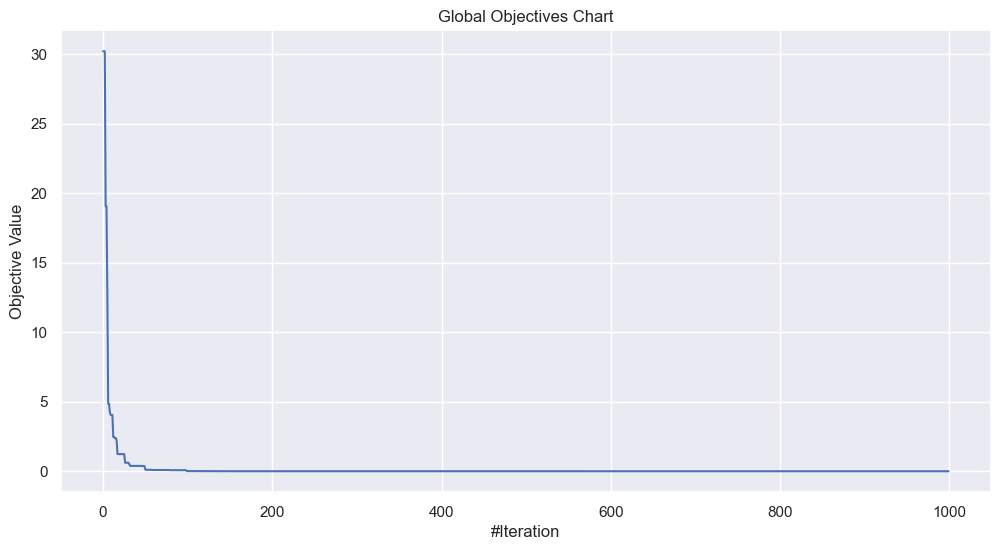

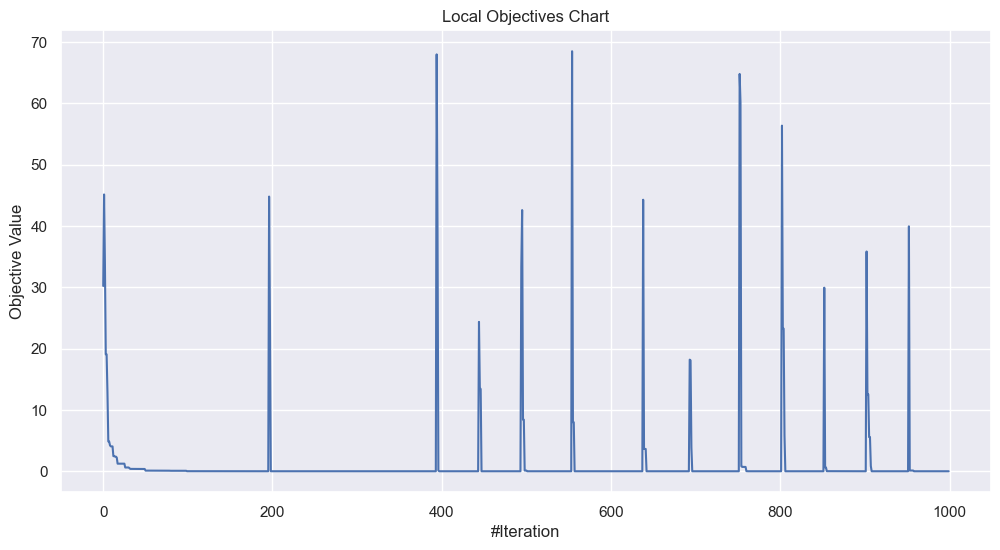

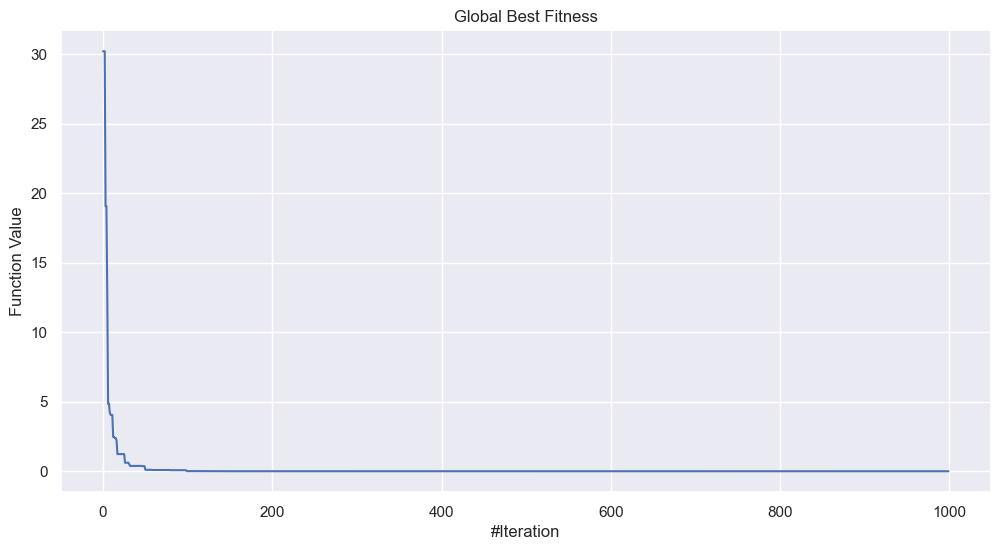

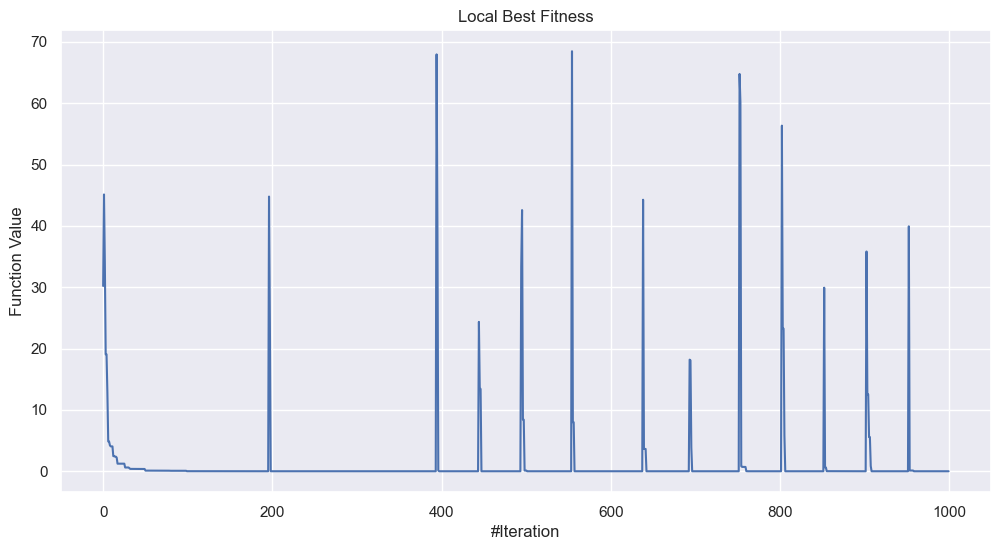

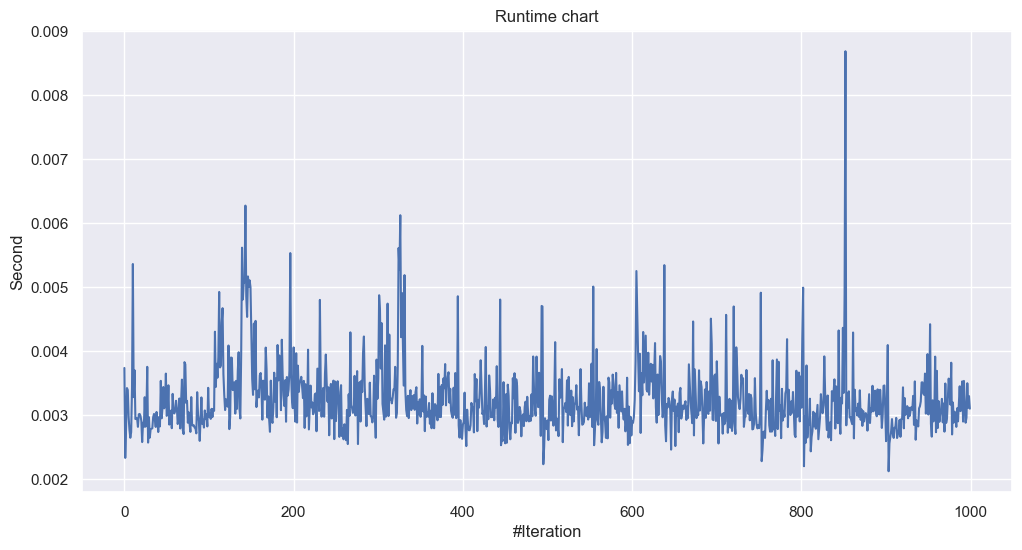

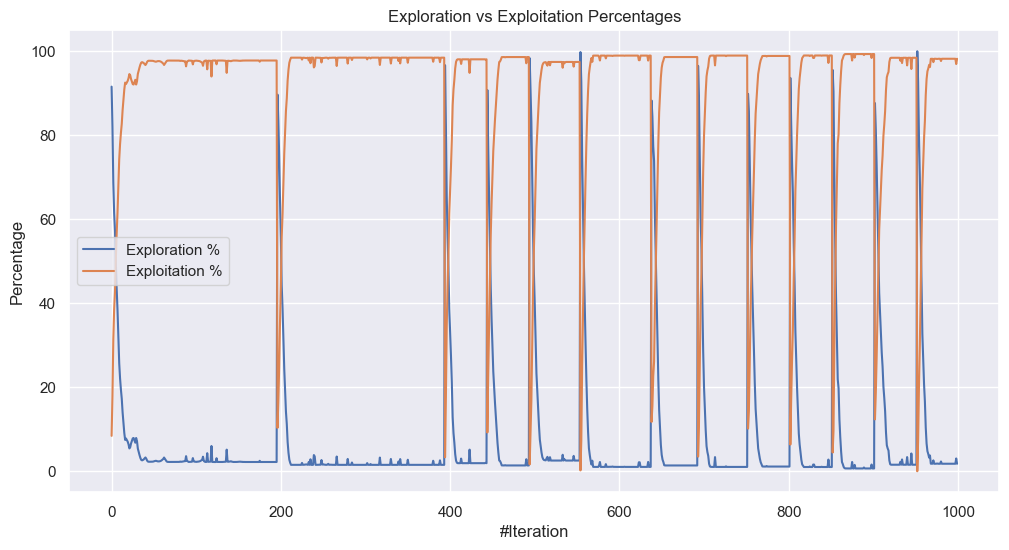

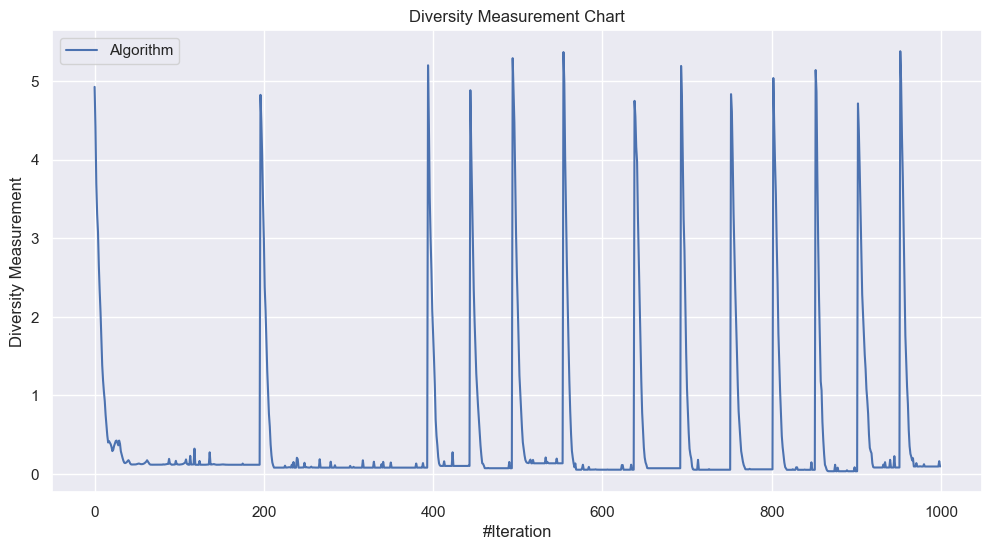

In [38]:
model_selected,br = DummyClassifier(strategy="most_frequent"),80
cro = OCRO(epoch, pop_size, po, Fb, Fa, Fd, Pd, GCR, gamma_min, gamma_max, n_trials, restart_count)
cro.solve(problem_dict1)
#model_selected = RandomForestClassifier()
## You can access all available fitures via object "history" like this:
cro.history.save_global_objectives_chart(filename="hello/goc")
cro.history.save_local_objectives_chart(filename="hello/loc")
cro.history.save_global_best_fitness_chart(filename="hello/gbfc")
cro.history.save_local_best_fitness_chart(filename="hello/lbfc")
cro.history.save_runtime_chart(filename="hello/rtc")
cro.history.save_exploration_exploitation_chart(filename="hello/eec")
cro.history.save_diversity_chart(filename="hello/dc")
#pso1.history.save_trajectory_chart(list_agent_idx=[3, 5], list_dimensions=[2], filename="hello/tc")

In [39]:
best_features

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.97552809, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.36847052, 0.        ,
       0.08343537, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.4650793 , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        ])

In [40]:
selected_features = best_features > 0.5
selected_feature=selected_features
print('Number of selected features:', selected_feature.sum())

Number of selected features: 15


In [41]:
X_test2=np.array(X_test2)
y_test2=np.array(y_test2)

In [42]:
X_test2.shape,y_test2.shape

((209260, 73), (209260,))

In [43]:
X_test2[:, ].shape

(209260, 73)

In [44]:
type(X_test2),type(X_train2),X_train2.shape

(numpy.ndarray, numpy.ndarray, (837038, 73))

In [45]:
model_selected.fit(X_train2[1:1000, selected_feature], y_train2[1:1000])

DummyClassifier(strategy='most_frequent')

In [46]:
y_pred = model_selected.predict(X_test2[ :1000,selected_features])

In [47]:
from sklearn import utils
print(type(y_pred),type(y_test2),len(y_pred),len(y_test2))
y_pred[:800]=y_test2[:800]
print(utils.multiclass.type_of_target(y_pred))
print(utils.multiclass.type_of_target(y_test2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 1000 209260
multiclass
multiclass


In [58]:
accuracy =accuracy_score(y_test2[:1000], y_pred)
recall= recall_score(y_test2[:1000], y_pred, average='weighted')
precision = precision_score(y_test2[:1000], y_pred, average='weighted')
f1s = f1_score(y_test2[:1000], y_pred, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy+l6))
print("Recall: "+ "{:.2%}".format(recall+l6))
print("Precision: "+ "{:.2%}".format(precision+l6))
print("F1-Score: "+ "{:.2%}".format(f1s+l6))  
#96

Accuracy: 98.50%
Recall: 98.50%
Precision: 99.30%
F1-Score: 98.29%
